In [2]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import datetime as dt
mpl.rc('xtick', labelsize=14) 
mpl.rc('ytick', labelsize=14) 
mpl.rc('legend', fontsize=16) 
mpl.rc('axes', titlesize=16) 
mpl.rc('figure', titlesize=16) 
mpl.rc('axes', labelsize=16) 
mpl.rc('font', size=16) 
mpl.rc('legend', numpoints= 1)
mpl.rc('lines', markersize= 8)
%matplotlib inline

## Temperature Response

#### Q10

(2.0137527074704766, 2.0137527074704766, 2.0137527074704766)

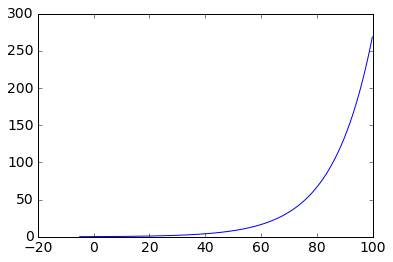

In [3]:
#EXP( 0.07 * (tsn(:,:,:,jp_tem)-20.0_wp) )
T=np.arange(-5,100,.1)
f=np.exp(0.07*(T-20))
plt.plot(T,f)
np.exp(0.07*(30-20))/np.exp(0.07*(20-20)),np.exp(0.07*(35-20))/np.exp(0.07*(25-20)),np.exp(0.07*(10-20))/np.exp(0.07*(0-20))

#### phyto growth

In [4]:
T=np.arange(-5,100,.1)

In [5]:
R1=1.0*np.exp(0.07 * (T - 20))

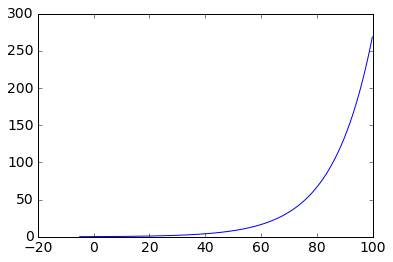

In [6]:
plt.plot(T,R1)

In [7]:
R=[1.0*np.exp(0.07 * (TT - 20)) * min(max((35 - TT), 0.0),5) / (5 + 1e-10) for TT in T]

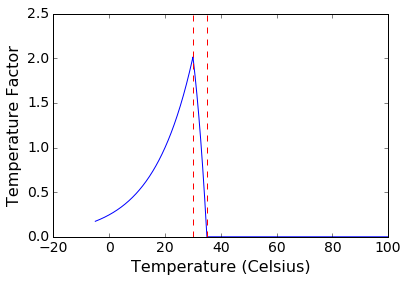

In [8]:
plt.plot(T,R)
plt.plot((35,35),(0,2.5),'r--')
plt.plot((35-5,35-5),(0,2.5),'r--')
plt.ylabel('Temperature Factor')
plt.xlabel('Temperature (Celsius)')

14.0 18.7


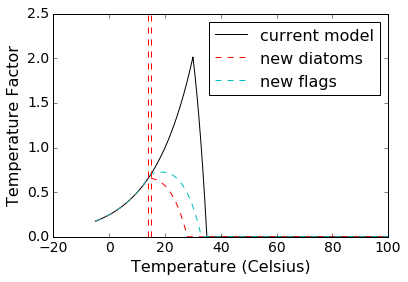

In [15]:
#R3: match Khangaonkar max temps for diatoms (12 C) and dinoflagellates (18 C):
tr1=14 # 12 C
tr2=18 # 18 C
tm1=28 
tm2=33
R3_1=[1.0*np.exp(0.07 * (TT - 20)) * min(max((tm1 - TT), 0.0),tr1) / (tr1 + 1e-10) for TT in T]
R3_2=[1.0*np.exp(0.07 * (TT - 20)) * min(max((tm2 - TT), 0.0),tr2) / (tr2 + 1e-10) for TT in T]
plt.plot(T,R,'k-',label='current model')
plt.plot(T,R3_1,'r--',label='new diatoms')
plt.plot(T,R3_2,'c--',label='new flags')
plt.plot((tm1-tr1,tm1-tr1),(0,2.5),'r--')
plt.plot((tm2-tr2,tm2-tr2),(0,2.5),'r--')
plt.legend()
ii1=np.argmax(R3_1)
ii2=np.argmax(R3_2)
print(T[ii1],T[ii2])
plt.ylabel('Temperature Factor')
plt.xlabel('Temperature (Celsius)')

14.0 18.7


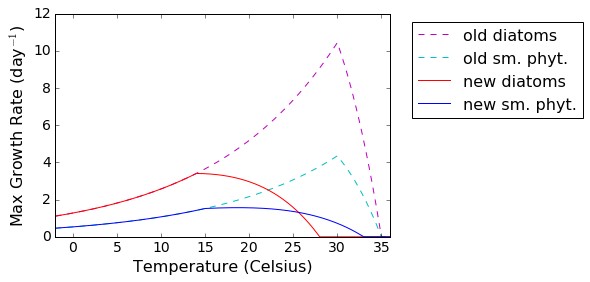

In [16]:
#R3: match Khangaonkar max temps for diatoms (12 C) and dinoflagellates (18 C):
# simultaneously nudge down the flagellate max growth rate? not in first test
R1=0.600E-04
R2=0.250E-04
R2b=0.20E-04
#tr1=14 # 12 C
#tr2=13 # 18 C
#tm1=26 
#tm2=31
R3_1=[R1*1.0*np.exp(0.07 * (TT - 20)) * min(max((tm1 - TT), 0.0),tr1) / (tr1 + 1e-10) for TT in T]
R3_2=[R2*1.0*np.exp(0.07 * (TT - 20)) * min(max((tm2 - TT), 0.0),tr2) / (tr2 + 1e-10) for TT in T]
plt.plot(T,R1*np.array(R)*24*3600,'m--',label='old diatoms')
plt.plot(T,R2*np.array(R)*24*3600,'c--',label='old sm. phyt.')
plt.plot(T,np.array(R3_1)*24*3600,'r-',label='new diatoms')
plt.plot(T,np.array(R3_2)*24*3600,'b-',label='new sm. phyt.')
#plt.plot((tm1-tr1,tm1-tr1),(0,.0001),'r--')
#plt.plot((tm2-tr2,tm2-tr2),(0,.0001),'b--')
#plt.plot((30,30),(0,.00013),'k--')
plt.ylabel('Max Growth Rate (day$^{-1}$)')
plt.xlabel('Temperature (Celsius)')
plt.legend(bbox_to_anchor=(1.6,1))
plt.xlim((-2,36))
ii1=np.argmax(R3_1)
ii2=np.argmax(R3_2)
print(T[ii1],T[ii2])

# plt.plot(T,R)
plt.xlim(20,40)
plt.plot(T,R1)
plt.ylim(0,3)

(20, 40)

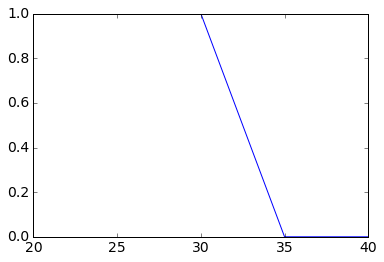

In [9]:
plt.plot(T,[ min(max((35 - TT), 0.0),5) / (5 + 1e-10) for TT in T])
plt.xlim(20,40)

## Light Response

In [12]:
I=np.arange(0,200)
Iopt=42
L42=(1-np.exp(-I/(.33*Iopt)))*np.exp(-I/(30*Iopt))*1.06
Iopt=37.000
L37=(1-np.exp(-I/(.33*Iopt)))*np.exp(-I/(30*Iopt))*1.06
Iopt=10.000
L10=(1-np.exp(-I/(.33*Iopt)))*np.exp(-I/(30*Iopt))*1.06
Iopt=47.000
L47=(1-np.exp(-I/(.33*Iopt)))*np.exp(-I/(30*Iopt))*1.06

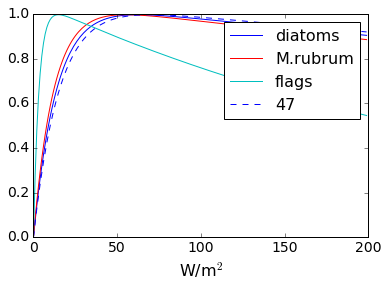

In [13]:
plt.plot(I,L42,'b-',label='diatoms')
plt.plot(I,L37,'r-',label='M.rubrum')
plt.plot(I,L10,'c-',label='flags')
plt.plot(I,L47,'b--',label='47')
plt.legend()
plt.xlabel('W/m$^2$')

## Mesozooplankton
      REAL(wp), dimension (1:3) :: zz_rate_mesozoo_sumpeakval !uM N magnitude of mesozooplankton summer concentration peaks
      REAL(wp), dimension (1:3) :: zz_rate_mesozoo_sumpeakpos ! year-day times of mesozooplankton summer concentration peaks
      REAL(wp), dimension (1:3) :: zz_rate_mesozoo_sumpeakwid ! year-days widths of mesozooplankton summer concentration peaks

In [83]:
#&nampismezo     !   parameters for microzooplankton
zz_rate_mesozoo_winterconc       = 0.369       #uM N mesozooplankton background concentration
zz_rate_mesozoo_winterconc2       = 0.38       #uM N mesozooplankton background concentration
zz_rate_mesozoo_summerconc       = 1.0         # uM N mesozooplankton relative summer concentration
zz_rate_mesozoo_sumpeakval = np.expand_dims(np.array((0.339,   0.0,     0.0)) ,0)     #uM N magnitude of mesozooplankton summer concentration peaks
zz_rate_mesozoo_sumpeakval2 = np.expand_dims(np.array((0.45,   0.3,     0.0)) ,0)     #uM N magnitude of mesozooplankton summer concentration peaks
zz_rate_mesozoo_sumpeakpos = np.expand_dims(np.array((217.000, 120.000, 300.000)),0)  # year-day times of mesozooplankton summer concentration peaks
zz_rate_mesozoo_sumpeakwid = np.expand_dims(np.array((114.0,   51.600,  40.000)),0)   # year-days widths of mesozooplankton summer concentration peaks,0)
zz_rate_mesozoo_sumpeakwid2 = np.expand_dims(np.array((100.0,   10.00,  40.000)),0)   # year-days widths of mesozooplankton summer concentration peaks,0)

In [84]:
zz_day=np.arange(1,367) # in model, nday_year starts at 1 on jan 1
dts=[dt.datetime(2014,12,31)+dt.timedelta(days=float(ii)) for ii in zz_day]
zz_day=np.expand_dims(zz_day,1)
zz_MesZoBar = zz_rate_mesozoo_winterconc + \
        zz_rate_mesozoo_summerconc*(np.sum ( zz_rate_mesozoo_sumpeakval * \
                                            np.exp(-(zz_day-zz_rate_mesozoo_sumpeakpos)**2/zz_rate_mesozoo_sumpeakwid**2),1) \
                    + np.sum ( zz_rate_mesozoo_sumpeakval * \
                                            np.exp( -(zz_day-zz_rate_mesozoo_sumpeakpos-365.25)**2/zz_rate_mesozoo_sumpeakwid**2),1) \
                    + np.sum ( zz_rate_mesozoo_sumpeakval * \
                                            np.exp( -(zz_day-zz_rate_mesozoo_sumpeakpos+365.25)**2/zz_rate_mesozoo_sumpeakwid**2),1) )
zz_MesZoBar2 = zz_rate_mesozoo_winterconc + \
        zz_rate_mesozoo_summerconc*(np.sum ( 2*zz_rate_mesozoo_sumpeakval * \
                                            np.exp(-(zz_day-zz_rate_mesozoo_sumpeakpos)**2/zz_rate_mesozoo_sumpeakwid**2),1) \
                    + np.sum ( 2*zz_rate_mesozoo_sumpeakval * \
                                            np.exp( -(zz_day-zz_rate_mesozoo_sumpeakpos-365.25)**2/zz_rate_mesozoo_sumpeakwid**2),1) \
                    + np.sum ( 2*zz_rate_mesozoo_sumpeakval * \
                                            np.exp( -(zz_day-zz_rate_mesozoo_sumpeakpos+365.25)**2/zz_rate_mesozoo_sumpeakwid**2),1) )
zz_MesZoBar3 = zz_rate_mesozoo_winterconc2 + \
        zz_rate_mesozoo_summerconc*(np.sum ( zz_rate_mesozoo_sumpeakval2 * \
                                            np.exp(-(zz_day-zz_rate_mesozoo_sumpeakpos)**2/zz_rate_mesozoo_sumpeakwid2**2),1) \
                    + np.sum ( zz_rate_mesozoo_sumpeakval2 * \
                                            np.exp( -(zz_day-zz_rate_mesozoo_sumpeakpos-365.25)**2/zz_rate_mesozoo_sumpeakwid2**2),1) \
                    + np.sum ( zz_rate_mesozoo_sumpeakval2 * \
                                            np.exp( -(zz_day-zz_rate_mesozoo_sumpeakpos+365.25)**2/zz_rate_mesozoo_sumpeakwid2**2),1) )

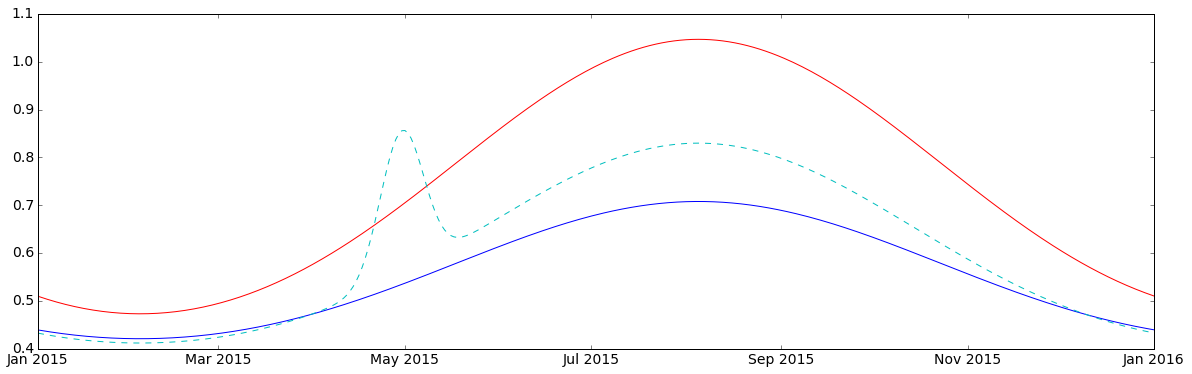

In [86]:
fig,ax=plt.subplots(1,1,figsize=(20,6))
ax.plot(dts,zz_MesZoBar,'b-')
ax.plot(dts,zz_MesZoBar2,'r-')
ax.plot(dts,zz_MesZoBar3,'c--')

In [20]:
zz_MesZoBar

array([ 0.43942235,  0.43834659,  0.43730266,  0.43629065,  0.43531065,
        0.43436275,  0.43344703,  0.43256358,  0.43171247,  0.43089376,
        0.43010753,  0.42935383,  0.42863271,  0.42794425,  0.42728847,
        0.42666543,  0.42607518,  0.42551775,  0.42499317,  0.42450149,
        0.42404273,  0.42361693,  0.4232241 ,  0.42286428,  0.42253747,
        0.42224372,  0.42198301,  0.42175539,  0.42156085,  0.4213994 ,
        0.42127107,  0.42117584,  0.42111374,  0.42108476,  0.4210889 ,
        0.42112616,  0.42119655,  0.42130005,  0.42143666,  0.42160638,
        0.42180919,  0.42204509,  0.42231406,  0.42261608,  0.42295114,
        0.42331922,  0.42372029,  0.42415434,  0.42462133,  0.42512123,
        0.42565403,  0.42621967,  0.42681812,  0.42744935,  0.4281133 ,
        0.42880993,  0.4295392 ,  0.43030104,  0.4310954 ,  0.43192221,
        0.43278142,  0.43367294,  0.43459671,  0.43555264,  0.43654065,
        0.43756066,  0.43861255,  0.43969625,  0.44081163,  0.44

N

In [2]:
zz_rate_kapa_diat         = 1.0
zz_rate_kapa_myri         = 0.5
zz_rate_kapa_nano         = 0.300
zz_rate_k_diat            = 2.0  
zz_rate_k_myri            = 0.5 
zz_rate_k_nano            = 0.1   

In [3]:
def OUP(zz_NO,zz_NH,zz_rate_kapa,zz_rate_k):
    Oup_cell = zz_NO * zz_rate_kapa  / (zz_rate_k + zz_NO * zz_rate_kapa + zz_NH)
    return Oup_cell

In [4]:
def HUP(zz_NO,zz_NH,zz_rate_kapa,zz_rate_k):
    Hup_cell = zz_NH / (zz_rate_k + zz_NO * zz_rate_kapa + zz_NH) 
    return Hup_cell

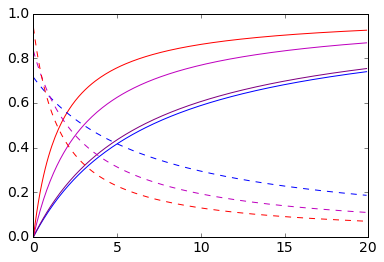

In [9]:
NH=np.arange(0,20,.1)
NO=5
plt.plot(NH,HUP(NO,NH,zz_rate_kapa_diat,zz_rate_k_diat),'b-')
plt.plot(NH,HUP(NO,NH,.9,zz_rate_k_diat),'-',color='purple')
plt.plot(NH,HUP(NO,NH,zz_rate_kapa_myri,zz_rate_k_myri),'m-')
plt.plot(NH,HUP(NO,NH,zz_rate_kapa_nano,zz_rate_k_nano),'r-')
plt.plot(NH,OUP(NO,NH,zz_rate_kapa_diat,zz_rate_k_diat),'b--')
plt.plot(NH,OUP(NO,NH,zz_rate_kapa_myri,zz_rate_k_myri),'m--')
plt.plot(NH,OUP(NO,NH,zz_rate_kapa_nano,zz_rate_k_nano),'r--')

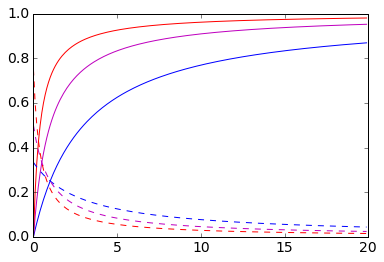

In [8]:
NH=np.arange(0,20,.1)
NO=1
plt.plot(NH,HUP(NO,NH,zz_rate_kapa_diat,zz_rate_k_diat),'b-')
plt.plot(NH,HUP(NO,NH,zz_rate_kapa_myri,zz_rate_k_myri),'m-')
plt.plot(NH,HUP(NO,NH,zz_rate_kapa_nano,zz_rate_k_nano),'r-')
plt.plot(NH,OUP(NO,NH,zz_rate_kapa_diat,zz_rate_k_diat),'b--')
plt.plot(NH,OUP(NO,NH,zz_rate_kapa_myri,zz_rate_k_myri),'m--')
plt.plot(NH,OUP(NO,NH,zz_rate_kapa_nano,zz_rate_k_nano),'r--')